In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [22]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

 )

Found 70295 files belonging to 38 classes.


In [23]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
 )

Found 17572 files belonging to 38 classes.


In [24]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [25]:
model=Sequential()

In [26]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [27]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [29]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [31]:
model.add(Dropout(0.25))

In [32]:
model.add(Flatten())

In [33]:
model.add(Dense(units=1500,activation='relu'))

In [34]:
model.add(Dropout(0.4))

In [35]:
model.add(Dense(units=38,activation='softmax'))

In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1580s 719ms/step - accuracy: 0.4131 - loss: 2.0597 - val_accuracy: 0.8322 - val_loss: 0.5235
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1551s 706ms/step - accuracy: 0.8429 - loss: 0.5053 - val_accuracy: 0.8735 - val_loss: 0.3950
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1493s 680ms/step - accuracy: 0.9080 - loss: 0.2890 - val_accuracy: 0.9238 - val_loss: 0.2289
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1520s 692ms/step - accuracy: 0.9380 - loss: 0.1909 - val_accuracy: 0.9398 - val_loss: 0.1869
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1851s 842ms/step - accuracy: 0.9529 - loss: 0.1430 - val_accuracy: 0.9492 - val_loss: 0.1574
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1704s 776ms/step - accuracy: 0.9645 - loss: 0.1092 - val_accuracy: 0.9474 - val_loss: 0.1733
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1628s 741ms/step - accuracy: 0.9713 - loss: 0.0894 - val_accuracy: 0.9559 - val_loss: 0.1406
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1573s 716ms/s

In [43]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 413s 188ms/step - accuracy: 0.9816 - loss: 0.0563


In [44]:
print(train_loss,train_acc)

0.05326761305332184 0.9829432964324951


In [41]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 107s 195ms/step - accuracy: 0.9530 - loss: 0.1633


In [42]:
print(val_loss,val_acc)

0.16375386714935303 0.9540177583694458


In [45]:
model.save("trained_model.keras") 

In [46]:
training_history.history

{'accuracy': [0.6084074378013611,
  0.8653246760368347,
  0.9164662957191467,
  0.9417170286178589,
  0.9548474550247192,
  0.9663134217262268,
  0.9729710221290588,
  0.9764136672019958,
  0.9801266193389893,
  0.982431173324585],
 'loss': [1.3195466995239258,
  0.4309612810611725,
  0.2582978308200836,
  0.1804225891828537,
  0.13582481443881989,
  0.10303275287151337,
  0.08511229604482651,
  0.072910837829113,
  0.06175456568598747,
  0.05683106184005737],
 'val_accuracy': [0.8322330713272095,
  0.8734919428825378,
  0.9237992167472839,
  0.9397905468940735,
  0.9492374062538147,
  0.9473594427108765,
  0.955895721912384,
  0.9623833298683167,
  0.9580582976341248,
  0.9540177583694458],
 'val_loss': [0.5235329270362854,
  0.39499029517173767,
  0.22889293730258942,
  0.1868627518415451,
  0.15742599964141846,
  0.1733204871416092,
  0.14059366285800934,
  0.1205211877822876,
  0.15083466470241547,
  0.16375389695167542]}

In [47]:
#Recording History in json
import json
with open("training_hist.json","w")as f:
    json.dump(training_history.history,f)

In [48]:
training_history.history['val_accuracy']

[0.8322330713272095,
 0.8734919428825378,
 0.9237992167472839,
 0.9397905468940735,
 0.9492374062538147,
 0.9473594427108765,
 0.955895721912384,
 0.9623833298683167,
 0.9580582976341248,
 0.9540177583694458]

In [49]:
###Accuracy Visualization

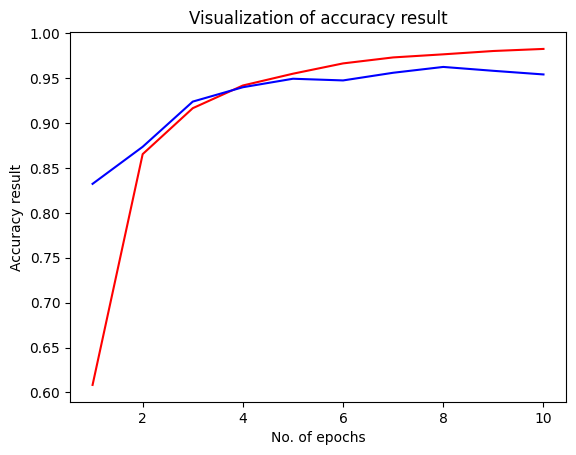

In [99]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy result")
plt.title("Visualization of accuracy result")
plt.show()


In [51]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [52]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

 )

Found 70295 files belonging to 38 classes.


In [53]:
y_pred=model.predict(test_set)
y_pred,y_pred. shape

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 477s 217ms/step


(array([[9.9991691e-01, 7.1680603e-05, 9.0179370e-08, ..., 1.2641505e-12,
         1.1141678e-11, 2.8069069e-10],
        [9.9999702e-01, 3.2771421e-09, 3.0444114e-10, ..., 6.6891888e-11,
         7.9835227e-12, 3.7753556e-10],
        [1.0000000e+00, 9.6402646e-09, 8.8013651e-13, ..., 6.8872498e-16,
         5.2465665e-15, 7.3058763e-13],
        ...,
        [7.4783912e-12, 7.0616675e-15, 1.6286700e-12, ..., 5.0818872e-15,
         4.9488618e-14, 9.9999976e-01],
        [9.1065502e-11, 4.2627577e-12, 5.3505783e-10, ..., 2.1946858e-12,
         6.1125542e-11, 9.9998844e-01],
        [1.9988719e-11, 1.5303434e-13, 5.9780382e-13, ..., 2.2538424e-16,
         8.2034271e-13, 9.9985468e-01]], dtype=float32),
 (70295, 38))

In [67]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(70295,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [82]:
true_categories = tf.concat ([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(70295, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [83]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(70295,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

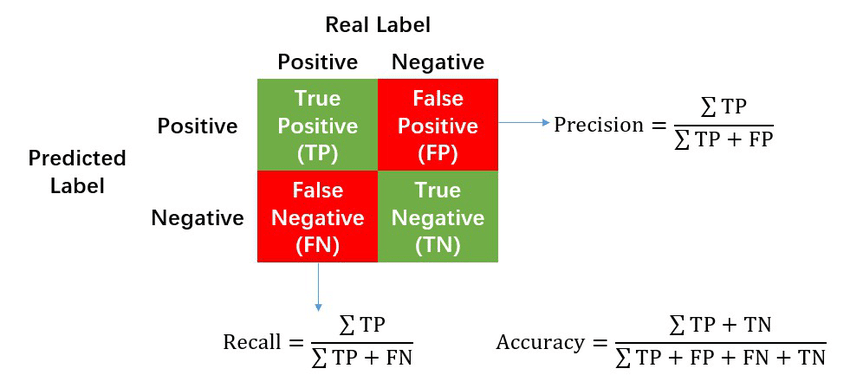

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.98      0.99      2016
                                 Apple___Black_rot       0.98      1.00      0.99      1987
                          Apple___Cedar_apple_rust       0.94      1.00      0.97      1760
                                   Apple___healthy       0.98      0.94      0.96      2008
                               Blueberry___healthy       0.98      0.99      0.98      1816
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      1.00      1683
                 Cherry_(including_sour)___healthy       0.95      1.00      0.98      1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.99      0.99      1642
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00      1907
               Corn_(maize)___Northern_Leaf_Blight       1.00      0.98      0.

In [90]:
cm= confusion_matrix(Y_true,predicted_categories)
cm

array([[1975,    1,    0, ...,    0,    0,    0],
       [   0, 1987,    0, ...,    0,    0,    0],
       [   0,    0, 1756, ...,    0,    0,    3],
       ...,
       [   0,    0,    0, ..., 1955,    0,    0],
       [   0,    0,    3, ...,    0, 1743,    0],
       [   0,    0,    2, ...,    0,    0, 1891]], dtype=int64)

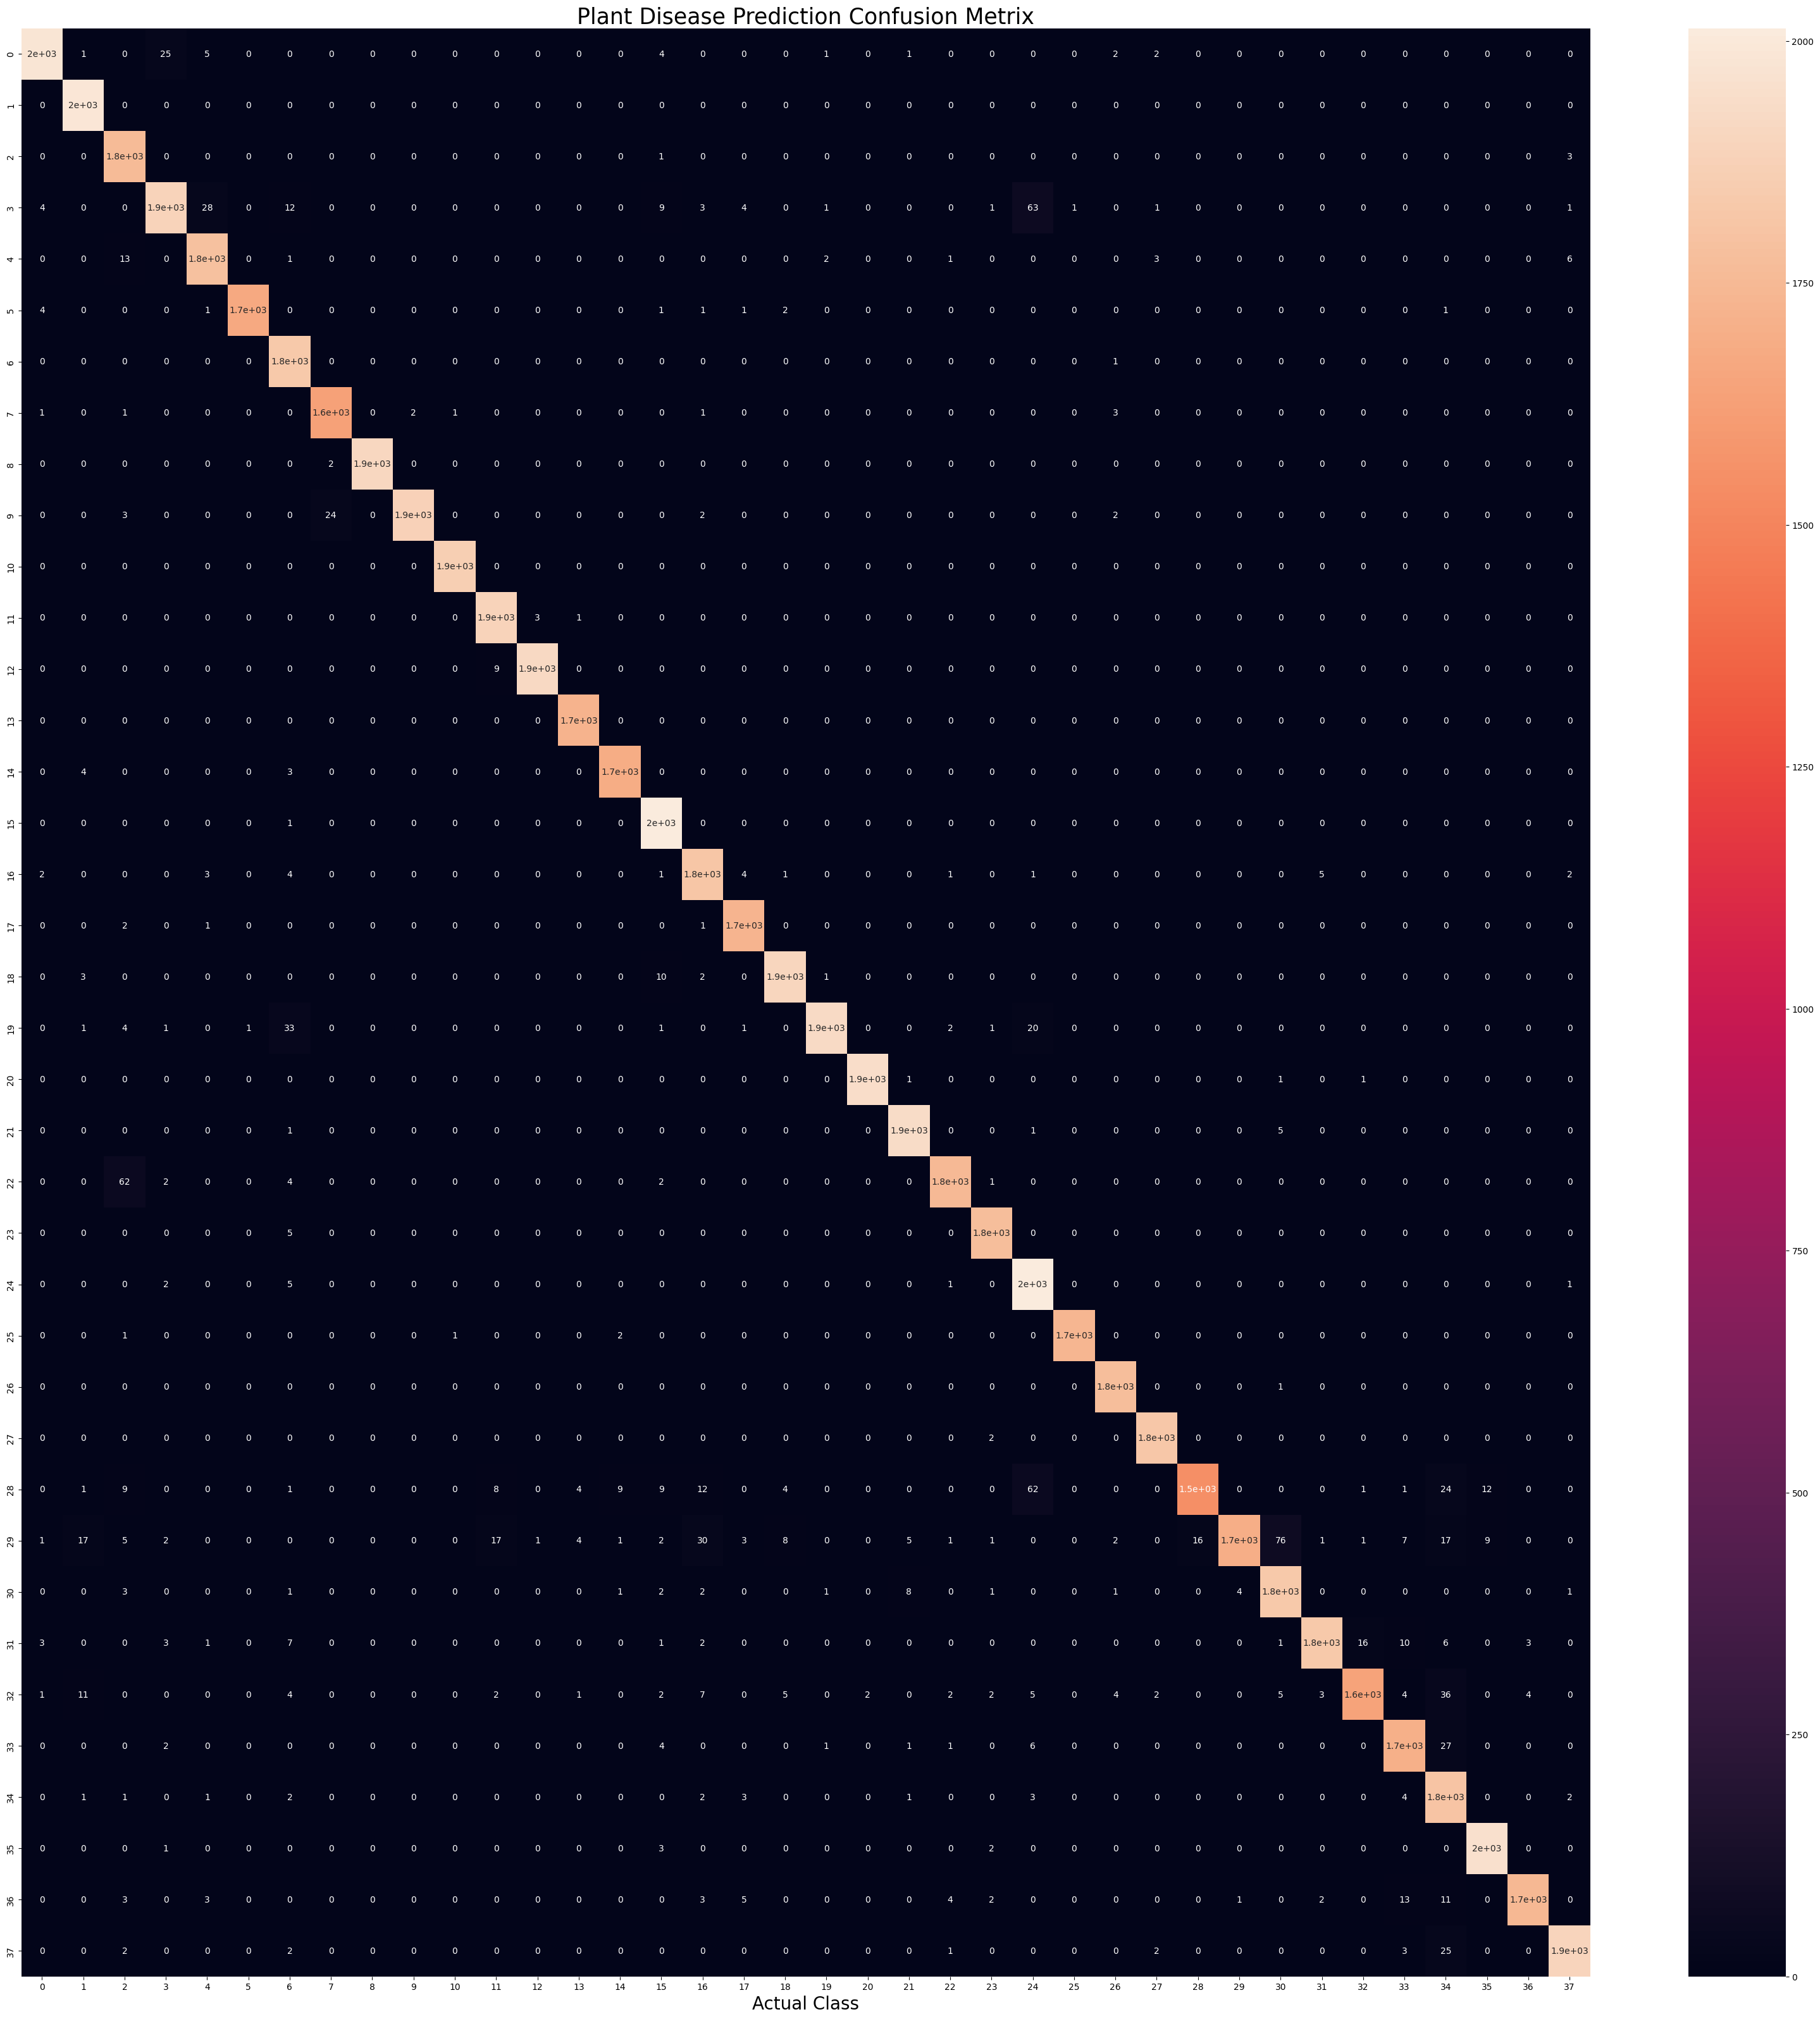

In [100]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize=20)
plt.xlabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Metrix",fontsize=25)
plt.show()